# Reinforcement learning - Final project demo notebook
## Nir Weingarten - ID 302528435

In [1]:
!git clone https://github.com/hopl1t/sokoban_rl.git

Cloning into 'sokoban_rl'...
remote: Enumerating objects: 338, done.
remote: Counting objects: 100% (338/338), done.
remote: Compressing objects: 100% (208/208), done.
remote: Total 338 (delta 227), reused 236 (delta 125), pack-reused 0
Receiving objects: 100% (338/338), 3.68 MiB | 8.94 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [ ]:
!cd sokoban_rl && git pull

Already up to date.


In [ ]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!apt-get install -y xvfb x11-utils
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
!pip install gym[box2d]
!pip install gym_sokoban
import os
os.chdir('sokoban_rl')
import time
import pandas as pd
from a2c_agent import *
from dqn_agent import *
import pickle
from models import *
import utils

In [13]:
def moving_average(iterable, window):
    averages = []
    for i in range(1, len(iterable)):
        averages.append(np.mean(iterable[max(0, i-window):i]))
    return averages

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

def plot_results(all_episode_rewards, title, window=100):
    window = 100
    fig, axes = plt.subplots(1, 1, figsize=(15, 7))
    axes.plot(all_episode_rewards)
    axes.plot(moving_average(all_episode_rewards, window=window))
    _ = axes.set_title('All episode rewards', fontsize=14)
    _ = axes.legend(['sum of reward per episode','moving average over {} eisodes'
                    .format(window)])
    _ = axes.set_xlabel('episode', fontsize=14)
    _ = axes.set_ylabel('rewards', fontsize=14)
    _ = fig.suptitle(title, fontsize=18)

## Lunar lander
In this section different agents and models are used to learn Lunar Lander

All agents are trained using the 'cone trick' and various tuned hyperparameters

Environment is Lunar lander continuous v2

In [10]:
all_agents = {}

### A2C setting 1 - discretisized action space
Action space is automatically split into 2X15 discrete actions (13 per axis)

In [ ]:
!rm -r ./saved_agents/a2c_1 
!mkdir ./saved_agents/a2c_1 && python trainer.py -env LunarLanderContinuous-v2 -model DiscreteActorCritic -epochs 3000 -obs_type BOX2D -action_type DISCRETIZIED  -print_interval 100 -eval_interval 400 -save_dir ./saved_agents/a2c_1 -log_dir . -log_interval 0 -lr 0.005 -num_discrete 15 -scheduler_gamma 0.75 -scheduler_interval 300 -hidden_size 256 -beta 0.003
with open(glob.glob('./saved_agents/a2c_1/*')[0], 'rb') as f:
    agent = pickle.load(f)
all_agents['a2c discretisized'] = agent

Using CUDA
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -561.633	min: -970.027		max: -306.639		%completed levels (sokoban only): 0.000
eps: 100, stats for last 100 eps:	avg eps reward: -293.598		avg eps step reward: -1.858		avg eps length: 157.080	 avg time: 0.251	tricks_used:0
eps: 200, stats for last 100 eps:	avg eps reward: -165.288		avg eps step reward: -0.949		avg eps length: 174.250	 avg time: 0.288	tricks_used:0
eps: 300, stats for last 100 eps:	avg eps reward: -59.639		avg eps step reward: -0.298		avg eps length: 199.870	 avg time: 0.372	tricks_used:0
stepped scheduler, new lr: 0.00375
eps: 400, stats for last 100 eps:	avg eps reward: 34.520		avg eps step reward: 0.150		avg eps length: 230.280	 avg time: 0.389	tricks_used:0
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -102.587	min: -309.462		max: 142.316		%completed levels (sokoban only): 0.000
eps: 500, stats for last 100 eps:	avg eps reward: -39.479		avg eps step reward: -

### A2C setting 2 - fixed action space
Action space is 8 pre defined action tuples

In [ ]:
!rm -r ./saved_agents/a2c_2
!mkdir ./saved_agents/a2c_2 && python trainer.py -env LunarLanderContinuous-v2 -model CommonActorCritic -epochs 3000 -obs_type BOX2D -action_type FIXED_LUNAR -print_interval 100 -eval_interval 400 -save_dir ./saved_agents/a2c_2 -log_dir . -log_interval 0 -lr 0.005 -num_discrete 15 -scheduler_gamma 0.75 -scheduler_interval 400 -hidden_size 256 -beta 0.003
with open(glob.glob('./saved_agents/a2c_2/*')[0], 'rb') as f:
    agent = pickle.load(f)
all_agents['a2c fixed'] = agent

Using CUDA
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -188.917	min: -403.082		max: -47.648		%completed levels (sokoban only): 0.000
eps: 100, stats for last 100 eps:	avg eps reward: -114.947		avg eps step reward: -0.857		avg eps length: 133.180	 avg time: 0.189	tricks_used:0
eps: 200, stats for last 100 eps:	avg eps reward: -103.364		avg eps step reward: -0.662		avg eps length: 156.050	 avg time: 0.227	tricks_used:0
eps: 300, stats for last 100 eps:	avg eps reward: -88.331		avg eps step reward: -0.728		avg eps length: 121.390	 avg time: 0.157	tricks_used:0
eps: 400, stats for last 100 eps:	avg eps reward: -14.908		avg eps step reward: -0.076		avg eps length: 196.760	 avg time: 0.295	tricks_used:0
stepped scheduler, new lr: 0.00375
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -13.424	min: -244.751		max: 231.404		%completed levels (sokoban only): 0.000
eps: 500, stats for last 100 eps:	avg eps reward: 91.111		avg eps step reward: 0.

### A2C setting 3 - Gaussian action space
Action space is a pair of $(\mu,\sigma)$ tuples that is used to generate continuous action over both axes

In [ ]:
!rm -r ./saved_agents/a2c_3
!mkdir ./saved_agents/a2c_3 && python trainer.py -env LunarLanderContinuous-v2 -model GaussianActorCritic -epochs 3000 -obs_type BOX2D -action_type GAUSSIAN -print_interval 100 -save_dir ./saved_agents/a2c_3 -log_dir . -log_interval 0 -lr 0.001 -num_discrete 15 -scheduler_gamma 0.75 -scheduler_interval 800 -hidden_size 256 -beta 0.003
with open(glob.glob('./saved_agents/a2c_3/*')[0], 'rb') as f:
    agent = pickle.load(f)
all_agents['a2c gaussian'] = agent

Using CUDA
eps: 100, stats for last 100 eps:	avg eps reward: -625.521		avg eps step reward: -4.221		avg eps length: 147.370	 avg time: 0.251	tricks_used:0
eps: 200, stats for last 100 eps:	avg eps reward: -791.525		avg eps step reward: -5.902		avg eps length: 134.120	 avg time: 0.209	tricks_used:0
eps: 300, stats for last 100 eps:	avg eps reward: -778.614		avg eps step reward: -5.911		avg eps length: 131.720	 avg time: 0.204	tricks_used:0
eps: 400, stats for last 100 eps:	avg eps reward: -697.335		avg eps step reward: -5.151		avg eps length: 135.380	 avg time: 0.211	tricks_used:0
eps: 500, stats for last 100 eps:	avg eps reward: -639.978		avg eps step reward: -4.798		avg eps length: 133.380	 avg time: 0.208	tricks_used:0
eps: 600, stats for last 100 eps:	avg eps reward: -653.994		avg eps step reward: -4.736		avg eps length: 138.090	 avg time: 0.217	tricks_used:0
eps: 700, stats for last 100 eps:	avg eps reward: -610.352		avg eps step reward: -4.811		avg eps length: 126.870	 avg time: 0

### A2C setting 4 - Convolutional NN model
Action space is discretisized like in the first trail only now to common layer is a 1D convolutional layer

In [ ]:
!rm -r ./saved_agents/a2c_4
!mkdir ./saved_agents/a2c_4 && python trainer.py -env LunarLanderContinuous-v2 -model DiscreteConvActorCritic -epochs 3000 -obs_type BOX2D -action_type DISCRETIZIED -print_interval 100 -eval_interval 400 -save_dir ./saved_agents/a2c_4 -log_dir . -log_interval 0 -lr 0.005 -num_discrete 13 -scheduler_gamma 0.75 -scheduler_interval 500 -hidden_size 256 -beta 0.003
with open(glob.glob('./saved_agents/a2c_4/*')[0], 'rb') as f:
    agent = pickle.load(f)
all_agents['a2c gaussian'] = agent

Using CUDA
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -826.696	min: -1465.293		max: -468.829		%completed levels (sokoban only): 0.000
eps: 100, stats for last 100 eps:	avg eps reward: -343.394		avg eps step reward: -2.508		avg eps length: 135.800	 avg time: 0.241	tricks_used:0
eps: 200, stats for last 100 eps:	avg eps reward: -180.923		avg eps step reward: -1.574		avg eps length: 114.920	 avg time: 0.197	tricks_used:0
eps: 300, stats for last 100 eps:	avg eps reward: -128.709		avg eps step reward: -1.093		avg eps length: 117.790	 avg time: 0.221	tricks_used:0
eps: 400, stats for last 100 eps:	avg eps reward: -465.500		avg eps step reward: -6.942		avg eps length: 67.060	 avg time: 0.104	tricks_used:0
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -468.764	min: -812.062		max: -227.510		%completed levels (sokoban only): 0.000
eps: 500, stats for last 100 eps:	avg eps reward: -460.738		avg eps step reward: -6.987		avg eps length: 65.940

### DQN setting 1 - Epsilon greedy + use PER
Action space is a fixed set, training epsilon greedy and PER

In [ ]:
!rm -r ./saved_agents/dqn_1
!mkdir ./saved_agents/dqn_1 && python trainer.py -env LunarLanderContinuous-v2 -model SimpleDQN -agent DQNAgent -epochs 3000 -obs_type BOX2D -action_type FIXED_LUNAR -print_interval 100 -eval_interval 400 -save_dir ./saved_agents/dqn_1 -log_dir . -log_interval 0 -lr 0.002 -num_discrete 15 -scheduler_gamma 0.75 -scheduler_interval 600 -hidden_size 512 -beta 0.003 -epsilon 1 -epsilon_decay 0.999
with open(glob.glob('./saved_agents/dqn_1/*')[0], 'rb') as f:
    agent = pickle.load(f)
all_agents['dqn epsilon greedy using PER'] = agent

Using CUDA
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -569.967	min: -1178.830		max: -325.050		%completed levels (sokoban only): 0.000
eps: 100, stats for last 100 eps:	avg eps reward: -200.112		avg eps step reward: -1.837		avg eps length: 107.910	 avg time: 0.108	tricks_used:0
eps: 200, stats for last 100 eps:	avg eps reward: -192.358		avg eps step reward: -1.571		avg eps length: 122.470	 avg time: 0.129	tricks_used:0
eps: 300, stats for last 100 eps:	avg eps reward: -182.949		avg eps step reward: -1.425		avg eps length: 128.370	 avg time: 0.150	tricks_used:0
eps: 400, stats for last 100 eps:	avg eps reward: -162.269		avg eps step reward: -0.973		avg eps length: 166.700	 avg time: 0.224	tricks_used:0
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -125.671	min: -255.197		max: 74.948		%completed levels (sokoban only): 0.000
eps: 500, stats for last 100 eps:	avg eps reward: -139.441		avg eps step reward: -0.563		avg eps length: 247.650

### DQN setting 2 - Epsilon soft + use PER
Action space is a fixed set, training epsilon soft and PER

In [ ]:
!rm -r ./saved_agents/dqn_2
!mkdir ./saved_agents/dqn_2 && python trainer.py -env LunarLanderContinuous-v2 -model SimpleDQN -agent DQNAgent -epochs 3000 -obs_type BOX2D -action_type FIXED_LUNAR -print_interval 100 -eval_interval 400 -save_dir ./saved_agents/dqn_2 -log_dir . -log_interval 0 -lr 0.002 -num_discrete 15 -scheduler_gamma 0.75 -scheduler_interval 700 -hidden_size 512 -beta 0.003
with open(glob.glob('./saved_agents/dqn_2/*')[0], 'rb') as f:
    agent = pickle.load(f)
all_agents['dqn epsilon soft using PER'] = agent

Using CUDA
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -227.578	min: -477.059		max: 11.336		%completed levels (sokoban only): 0.000
eps: 100, stats for last 100 eps:	avg eps reward: -275.443		avg eps step reward: -2.916		avg eps length: 93.460	 avg time: 0.106	tricks_used:0
eps: 200, stats for last 100 eps:	avg eps reward: -125.605		avg eps step reward: -1.824		avg eps length: 68.880	 avg time: 0.063	tricks_used:0
eps: 300, stats for last 100 eps:	avg eps reward: -126.360		avg eps step reward: -1.833		avg eps length: 68.950	 avg time: 0.063	tricks_used:0
eps: 400, stats for last 100 eps:	avg eps reward: -130.690		avg eps step reward: -1.896		avg eps length: 68.940	 avg time: 0.062	tricks_used:0
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -130.239	min: -314.349		max: 35.144		%completed levels (sokoban only): 0.000
eps: 500, stats for last 100 eps:	avg eps reward: -134.053		avg eps step reward: -1.948		avg eps length: 68.820	 avg ti

### DQN setting 3 - Epsilon greedy + no PER
Action space is a fixed set, training epsilon greedy without PER

In [33]:
!rm -r ./saved_agents/dqn_3
!mkdir ./saved_agents/dqn_3 && python trainer.py -env LunarLanderContinuous-v2 -model SimpleDQN -agent DQNAgent -epochs 3000 -obs_type BOX2D -action_type FIXED_LUNAR -print_interval 100 -eval_interval 400 -save_dir ./saved_agents/dqn_3 -log_dir . -log_interval 0 -lr 0.002 -num_discrete 15 -scheduler_gamma 0.75 -scheduler_interval 700 -hidden_size 512 -beta 0.003 -epsilon 1 -epsilon_decay 0.999 -no_PER
with open(glob.glob('./saved_agents/dqn_3/*')[0], 'rb') as f:
    agent = pickle.load(f)
all_agents['dqn epsilon greedy not using PER'] = agent

Using CUDA
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -643.451	min: -818.609		max: -477.363		%completed levels (sokoban only): 0.000
eps: 100, stats for last 100 eps:	avg eps reward: -213.175		avg eps step reward: -2.015		avg eps length: 104.520	 avg time: 0.094	tricks_used:0
eps: 200, stats for last 100 eps:	avg eps reward: -197.115		avg eps step reward: -1.843		avg eps length: 106.930	 avg time: 0.094	tricks_used:0
eps: 300, stats for last 100 eps:	avg eps reward: -167.638		avg eps step reward: -1.430		avg eps length: 117.220	 avg time: 0.108	tricks_used:0
eps: 400, stats for last 100 eps:	avg eps reward: -109.332		avg eps step reward: -0.587		avg eps length: 186.400	 avg time: 0.216	tricks_used:0
********** Evaluation **********
Evaluation on last 100 episodes:	mean: -19.912	min: -227.885		max: 209.650		%completed levels (sokoban only): 0.000
eps: 500, stats for last 100 eps:	avg eps reward: -131.539		avg eps step reward: -0.534		avg eps length: 246.220	

### Visualization of resutls
We present a comparison of the 4 best trained agents divided into categories A2C and DQN

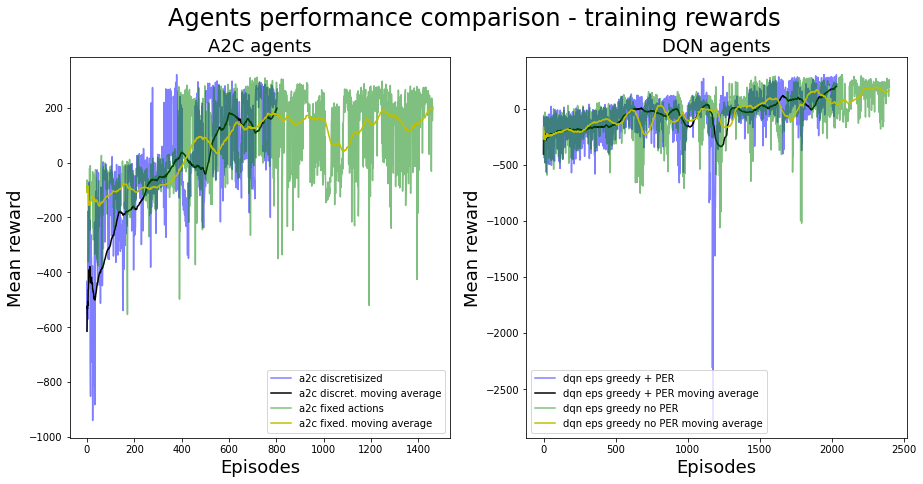

In [57]:
WINDOW = 100
COLORS = ['b', 'g', 'c', 'm', 'y', 'k']
fig, axes = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle('Agents performance comparison - training rewards', fontsize=24)
axes[0].set_title('A2C agents', fontsize=18)
axes[1].set_title('DQN agents', fontsize=18)
axes[0].set_xlabel('Episodes', fontsize=18)
axes[0].set_ylabel('Mean reward', fontsize=18)
axes[1].set_xlabel('Episodes', fontsize=18)
axes[1].set_ylabel('Mean reward', fontsize=18)
a2c_agents = [all_agents['a2c discretisized'], all_agents['a2c fixed']]
dqn_agents = [all_agents['dqn epsilon greedy using PER'], 
              all_agents['dqn epsilon greedy not using PER']]

for i, (a2c_agent, dqn_agent) in enumerate(zip(a2c_agents, dqn_agents)):
    axes[0].plot(a2c_agent.all_rewards, color=COLORS[i], alpha=0.5)
    axes[0].plot(moving_average(a2c_agent.all_rewards, window=WINDOW),
                 color=COLORS[::-1][i])
    axes[1].plot(dqn_agent.all_rewards, color=COLORS[i], alpha=0.5)
    axes[1].plot(moving_average(dqn_agent.all_rewards, window=WINDOW),
                 color=COLORS[::-1][i])
_ = axes[0].legend(['a2c discretisized', 'a2c discret. moving average',
                'a2c fixed actions', 'a2c fixed. moving average'])
_ = axes[1].legend(['dqn eps greedy + PER', 'dqn eps greedy + PER moving average',
                'dqn eps greedy no PER', 'dqn eps greedy no PER moving average'])

#### We proceed to display results of the best a2c model in validation mode
This includes a graph over 300 new episodes over a greedy policy and an episode video

In [58]:
all_rewards, all_episode_rewards, _ = utils.evaluate(
    agent=all_agents['a2c discretisized'],
    num_episodes=300,
    render=False)

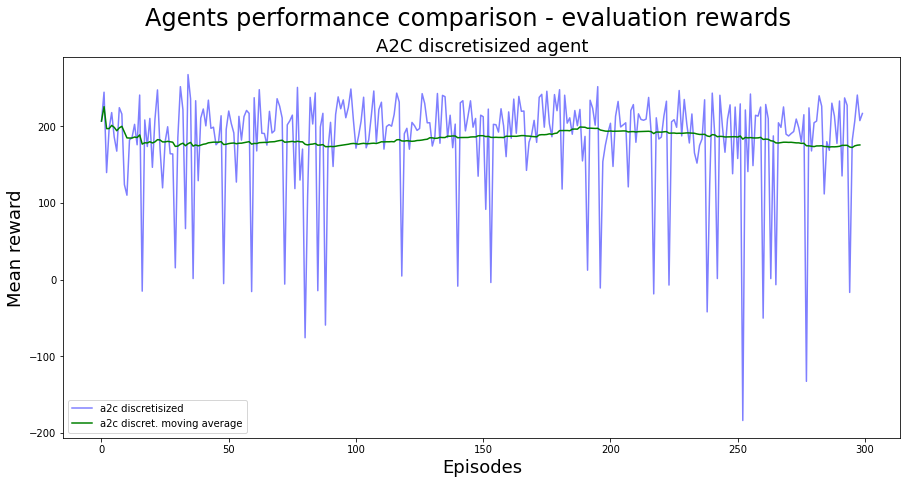

In [61]:
WINDOW = 100
COLORS = ['b', 'g', 'c', 'm', 'y', 'k']
a2c_agent = all_agents['a2c discretisized']
fig, axes = plt.subplots(1, 1, figsize=(15,7))
fig.suptitle('Agents performance comparison - evaluation rewards', fontsize=24)
axes.set_title('A2C discretisized agent', fontsize=18)
axes.set_xlabel('Episodes', fontsize=18)
axes.set_ylabel('Mean reward', fontsize=18)
axes.plot(all_episode_rewards, color=COLORS[0], alpha=0.5)
axes.plot(moving_average(all_episode_rewards, window=WINDOW),color=COLORS[1])
_ = axes.legend(['a2c discretisized', 'a2c discret. moving average'])

In [5]:
all_rewards, all_episode_rewards, _ = utils.evaluate(
    agent=a2c_agent, num_episodes=1, render=True)
print('played episode reward: {}'.format(all_episode_rewards[0]))
show_video()

Saving render video to /content/sokoban_rl/video
played episode reward: 195.33726035441777


## Sokoban
As Sokoban training is very long it has been done is a seperate notebook.
We include here only the results and the visualizaiton
Environment is Sokoban Push&Pull 

In [2]:
# We first need to revert back to the old commit in order to load the older version of the agent
!git clone https://github.com/hopl1t/sokoban_rl.git
!cd sokoban_rl && git checkout c1dc3130d1cae8c491e8491f544258c4b28bff36

Note: checking out 'c1dc3130d1cae8c491e8491f544258c4b28bff36'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at c1dc313 Added common and conv neural nets, fixed a small bug in EnvWrapper


In [5]:
from agent import *
from models import *

In [11]:
SOKOBAN_PICKLE = '/content/drive/MyDrive/RL_project/saved_agents/CommonActorCritic_PushAndPull-Sokoban-v2_2108021908.pkl'
with open(SOKOBAN_PICKLE, 'rb') as f:
    agent = pickle.load(f)

#### Pickled agent
This agent was trained for 3 days (~350K episodes) on an older version of this RL framework with the following CLI command:

``!python sokoban_rl/agent.py -env PushAndPull-Sokoban-v2 -model CommonActorCritic -obs_type ROOM_STATE_VECTOR -trajectory_len 300 -epochs 300000 -lr 0.0003 -discount_gamma 0.9 -scheduler_gamma 0.99 -action_type PUSH_PULL -async_env -num_env 2 -async_sleep_interval 0.2``

We revert the git back to it's older setting in order to load the pickle
Unfortunately we cannot use the *evaluate()* method on this agent as it is from an older unsupported version. We can however show it's progress through training rewards

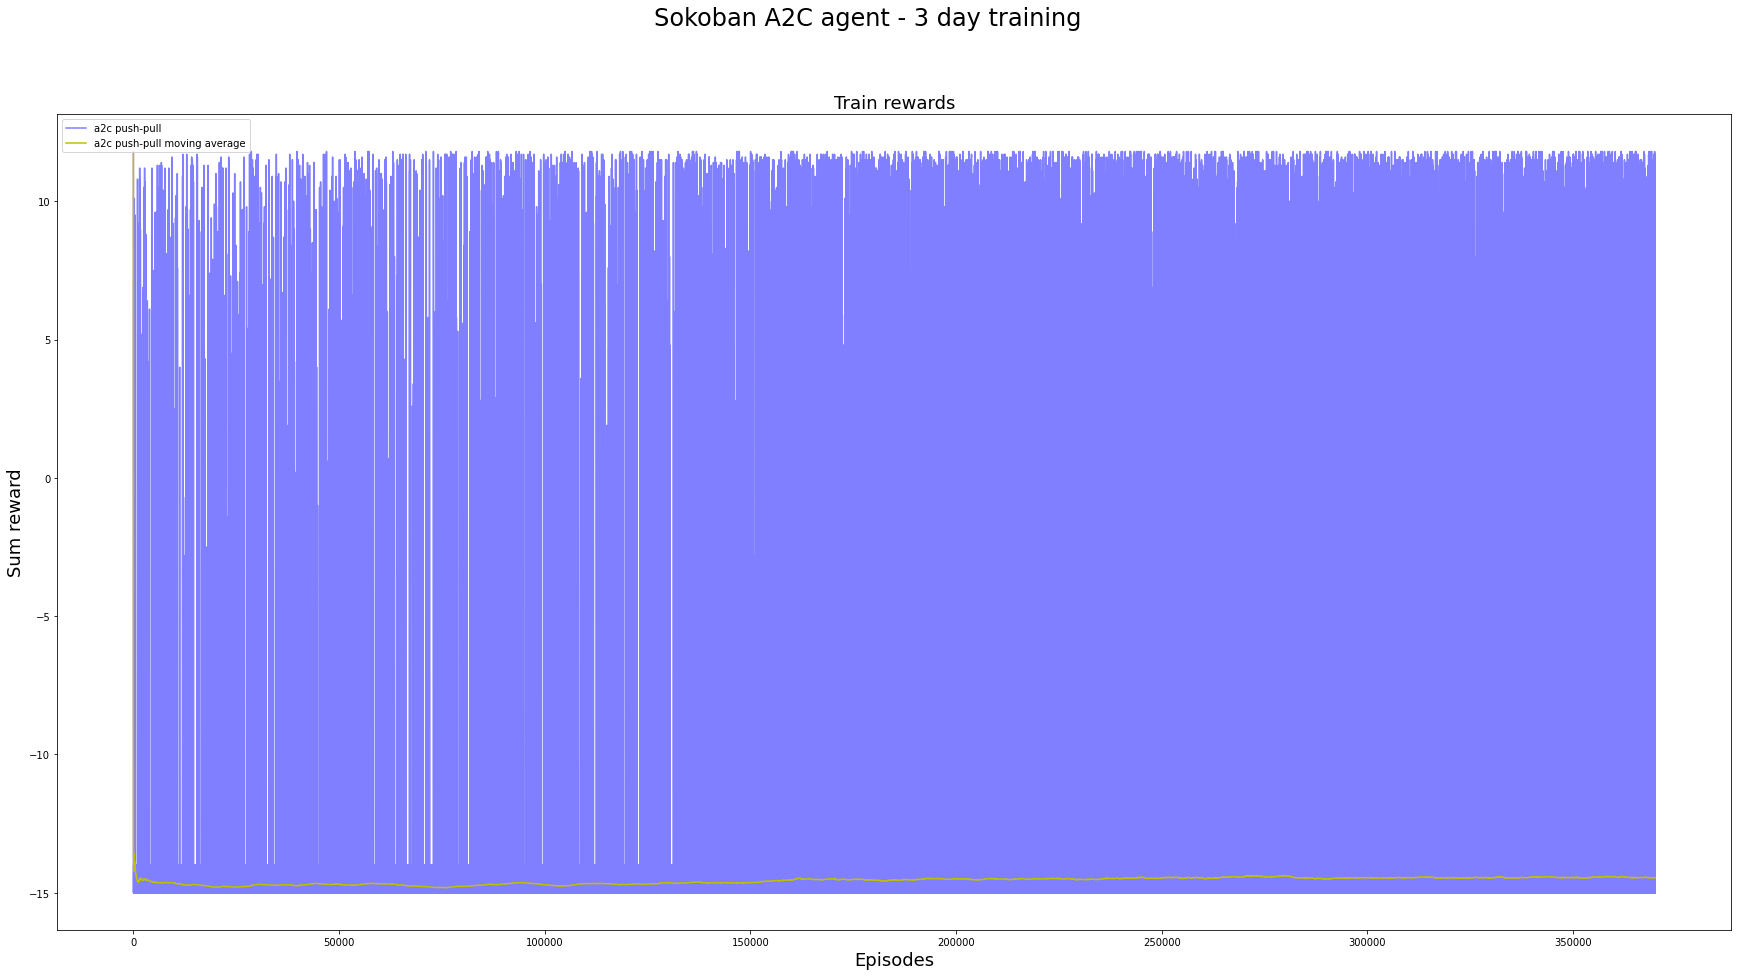

In [16]:
WINDOW = 10000
COLORS = ['b', 'g', 'c', 'm', 'y', 'k']
fig, axes = plt.subplots(1, 1, figsize=(30, 15))
fig.suptitle('Sokoban A2C agent - 3 day training', fontsize=24)
axes.set_title('Train rewards', fontsize=18)
axes.set_xlabel('Episodes', fontsize=18)
axes.set_ylabel('Sum reward', fontsize=18)
axes.plot(agent.all_rewards, color=COLORS[0], alpha=0.5)
axes.plot(moving_average(agent.all_rewards, window=WINDOW), color=COLORS[4])
_ = axes.legend(['a2c push-pull', 'a2c push-pull moving average'])

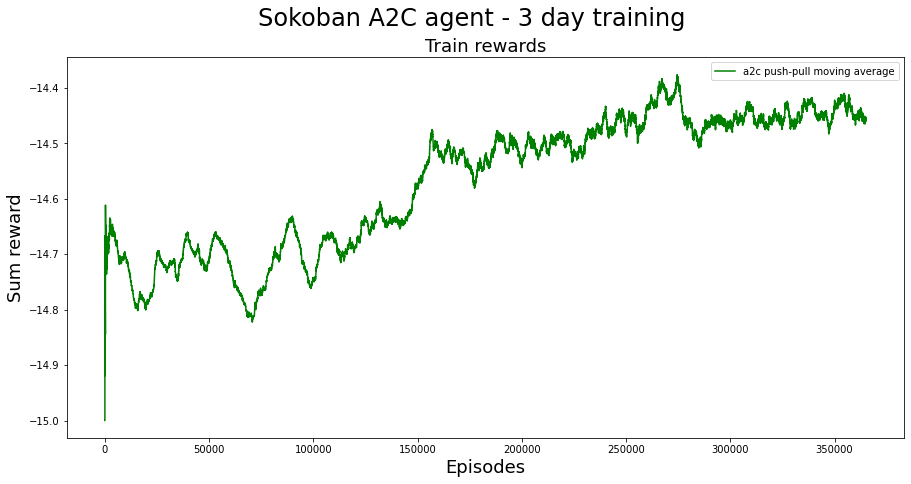

In [19]:
WINDOW = 10000
COLORS = ['b', 'g', 'c', 'm', 'y', 'k']
fig, axes = plt.subplots(1, 1, figsize=(15, 7))
fig.suptitle('Sokoban A2C agent - 3 day training', fontsize=24)
axes.set_title('Train rewards', fontsize=18)
axes.set_xlabel('Episodes', fontsize=18)
axes.set_ylabel('Sum reward', fontsize=18)
axes.plot(moving_average(agent.all_rewards[5000:], window=WINDOW), color=COLORS[1])
_ = axes.legend(['a2c push-pull moving average'])